# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
!pip install statsmodels


## Loading the dataset

In [21]:
from google.colab import files
uploaded = files.upload()


In [22]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("used_device_data.csv")

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [23]:
# Display the dimensions of the dataset (number of rows and columns)
print("Dataset dimensions:", df.shape)

# Display the column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Check for any missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset dimensions: (3454, 15)

Column names and data types:
brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

Basic statistics for numerical columns:
       screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          

In [24]:
# Display unique values for categorical columns
print("\nUnique values for categorical columns:")
print(df.select_dtypes(include=['object']).nunique())

# Display value counts for categorical columns
print("\nValue counts for categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print("\n", col)
    print(df[col].value_counts())



Unique values for categorical columns:
brand_name    34
os             4
4g             2
5g             2
dtype: int64

Value counts for categorical columns:

 brand_name
brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

 os
os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

 4g
4g
yes    2335
no     1119
Name: count, dtype: int64

 5g
5g
no     3302
ye

In [25]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("\nDuplicate rows found!")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")

# Check for any illogical values or inconsistencies in the data
# (e.g., negative values where they shouldn't be, unrealistic values)
# This may vary depending on the specific domain knowledge and context of the dataset
# Perform domain-specific checks accordingly
# Example: Check if screen_size, main_camera_mp, or selfie_camera_mp have negative values
negative_values_check = df[(df['screen_size'] < 0) | (df['main_camera_mp'] < 0) | (df['selfie_camera_mp'] < 0)]
if not negative_values_check.empty:
    print("\nNegative values found in screen_size, main_camera_mp, or selfie_camera_mp:")
    print(negative_values_check)
else:
    print("\nNo negative values found in screen_size, main_camera_mp, or selfie_camera_mp.")



No duplicate rows found.

No negative values found in screen_size, main_camera_mp, or selfie_camera_mp.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

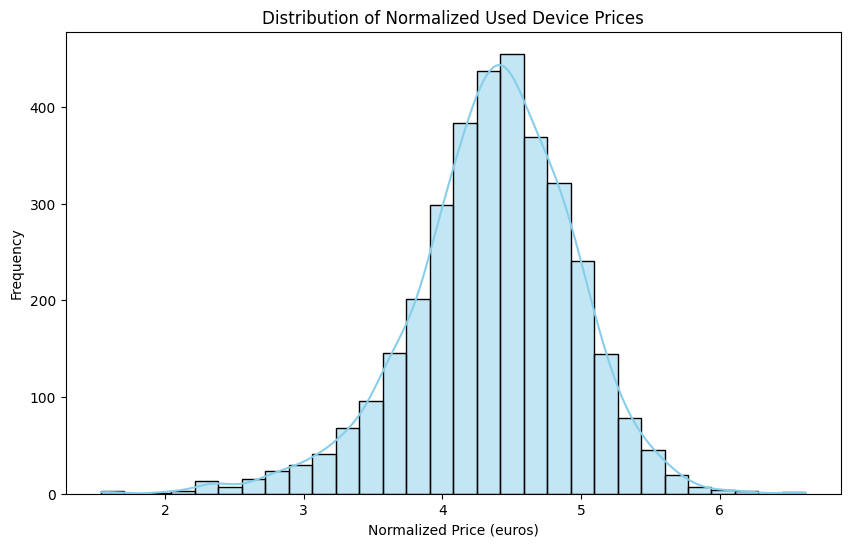

Percentage of the used device market dominated by Android devices: 93.05153445280834


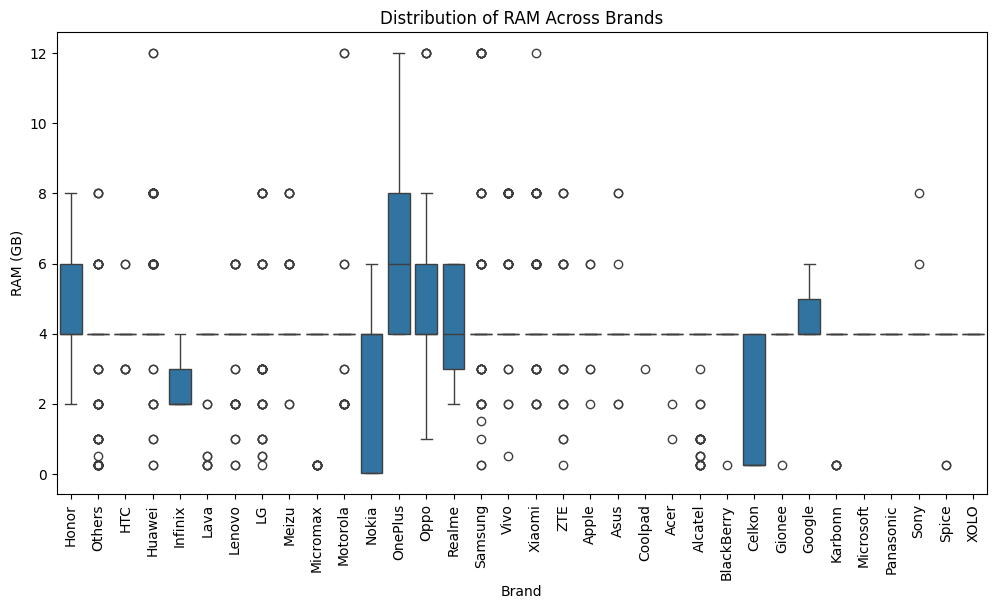

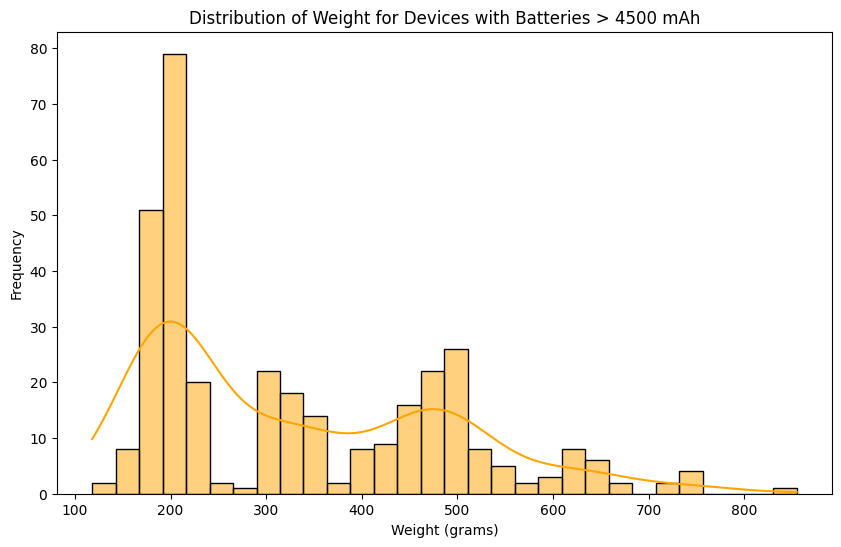

<ipython-input-26-106bfdaf90a6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts_by_brand.index, y=device_counts_by_brand.values, palette='muted')


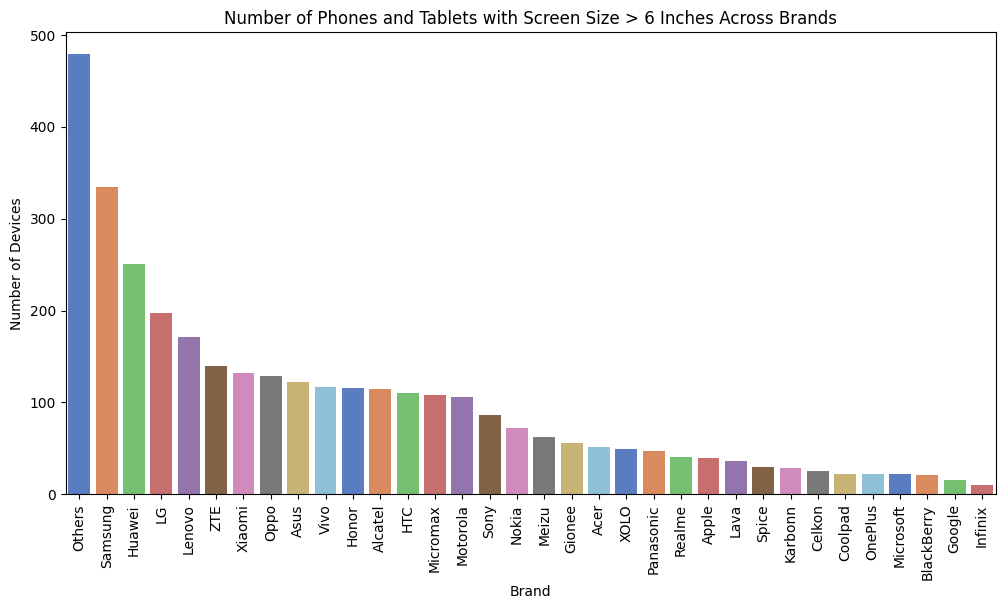

<ipython-input-26-106bfdaf90a6>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand_name', data=high_resolution_selfie_devices, palette='pastel')


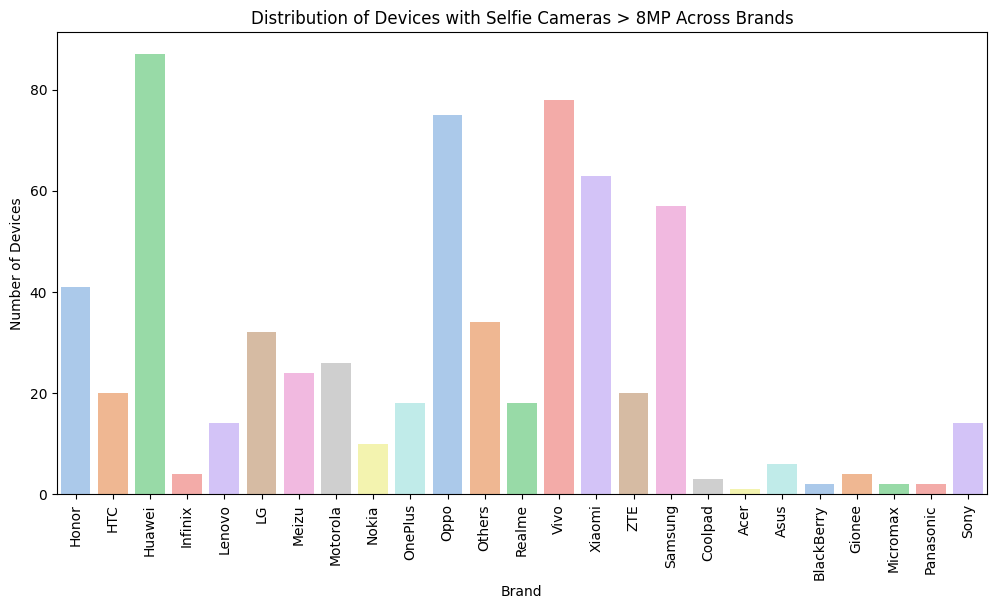

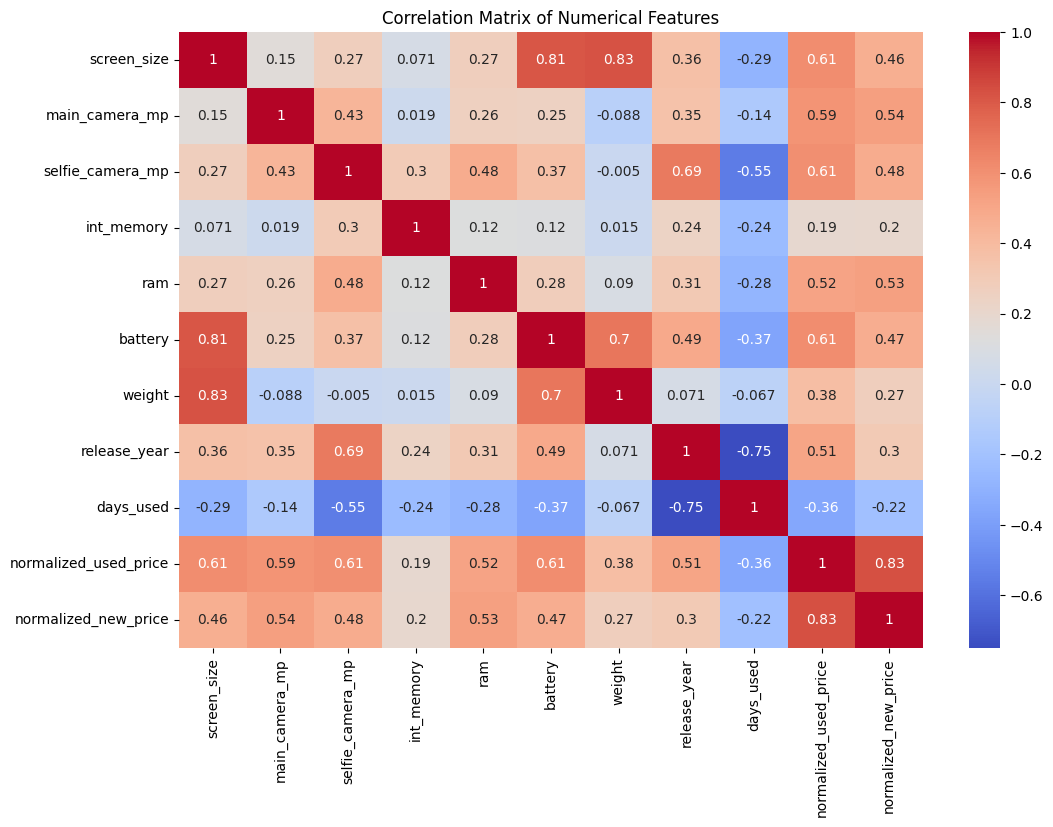

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1: Distribution of normalized used device prices
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_used_price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Price (euros)')
plt.ylabel('Frequency')
plt.show()

# Question 2: Percentage of the used device market dominated by Android devices
android_devices_percentage = (df['os'].value_counts(normalize=True) * 100)['Android']
print("Percentage of the used device market dominated by Android devices:", android_devices_percentage)

# Question 3: Distribution of RAM across brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='ram', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of RAM Across Brands')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.show()

# Question 4: Distribution of weights for devices with batteries > 4500 mAh
large_battery_devices = df[df['battery'] > 4500]
plt.figure(figsize=(10, 6))
sns.histplot(large_battery_devices['weight'], kde=True, bins=30, color='orange')
plt.title('Distribution of Weight for Devices with Batteries > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

# Question 5: Number of phones and tablets with screen size > 6 inches across brands
large_screen_devices = df[df['screen_size'] > 6]
device_counts_by_brand = large_screen_devices['brand_name'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts_by_brand.index, y=device_counts_by_brand.values, palette='muted')
plt.xticks(rotation=90)
plt.title('Number of Phones and Tablets with Screen Size > 6 Inches Across Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.show()

# Question 6: Distribution of devices with selfie cameras > 8MP across brands
high_resolution_selfie_devices = df[df['selfie_camera_mp'] > 8]
plt.figure(figsize=(12, 6))
sns.countplot(x='brand_name', data=high_resolution_selfie_devices, palette='pastel')
plt.xticks(rotation=90)
plt.title('Distribution of Devices with Selfie Cameras > 8MP Across Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.show()

# Question 7: Correlation matrix and heatmap
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [27]:
# Missing value treatment
# Option 1: Impute missing values with median for numerical columns and mode for categorical columns
df['main_camera_mp'].fillna(df['main_camera_mp'].median(), inplace=True)
df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].median(), inplace=True)
df['int_memory'].fillna(df['int_memory'].median(), inplace=True)
df['ram'].fillna(df['ram'].median(), inplace=True)
df['battery'].fillna(df['battery'].median(), inplace=True)
df['weight'].fillna(df['weight'].median(), inplace=True)

# Option 2: Drop rows with missing values
# df.dropna(inplace=True)

# Feature engineering
# Create a new feature representing the ratio of main_camera_mp to screen_size
df['camera_to_screen_ratio'] = df['main_camera_mp'] / df['screen_size']

# Outlier detection and treatment (if needed)
# Identify outliers using z-score or IQR and treat them accordingly

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['brand_name', 'os', '4g', '5g'])

# Splitting the dataset into features and target variable
X = df_encoded.drop(columns=['normalized_used_price'])
y = df_encoded['normalized_used_price']

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## EDA

- It is a good idea to explore the data once again after manipulating it.

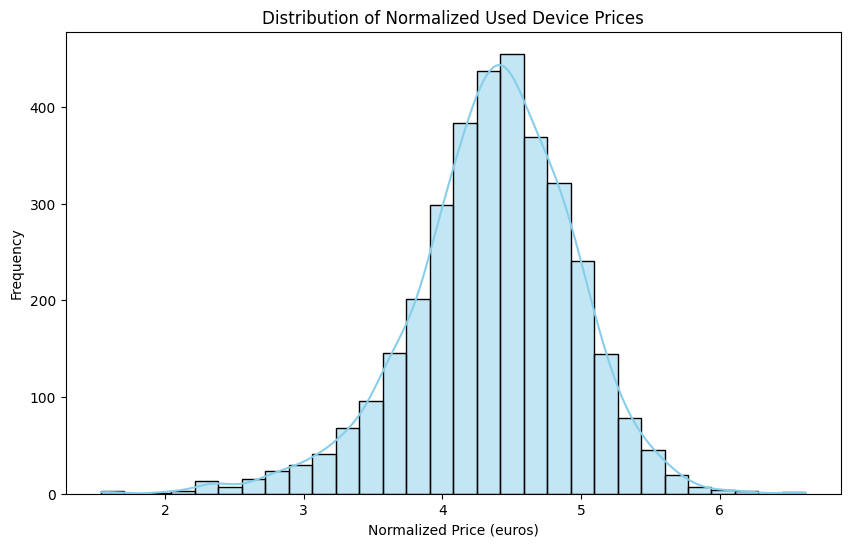

Percentage of the used device market dominated by Android devices: 93.05153445280834


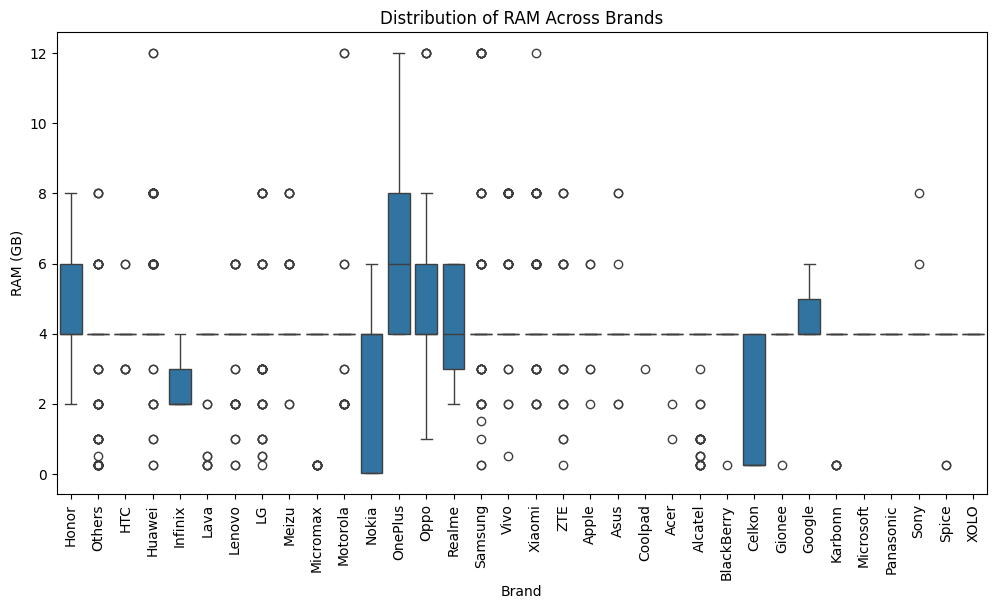

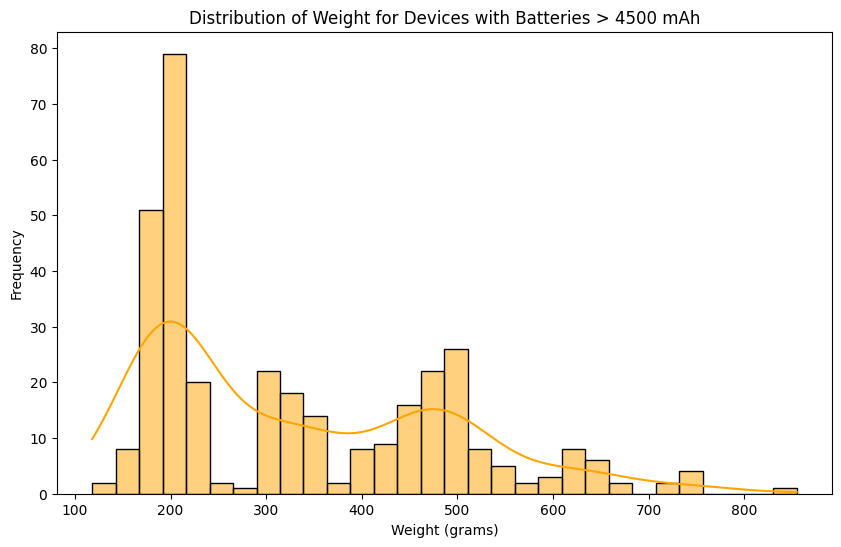

<ipython-input-28-106bfdaf90a6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts_by_brand.index, y=device_counts_by_brand.values, palette='muted')


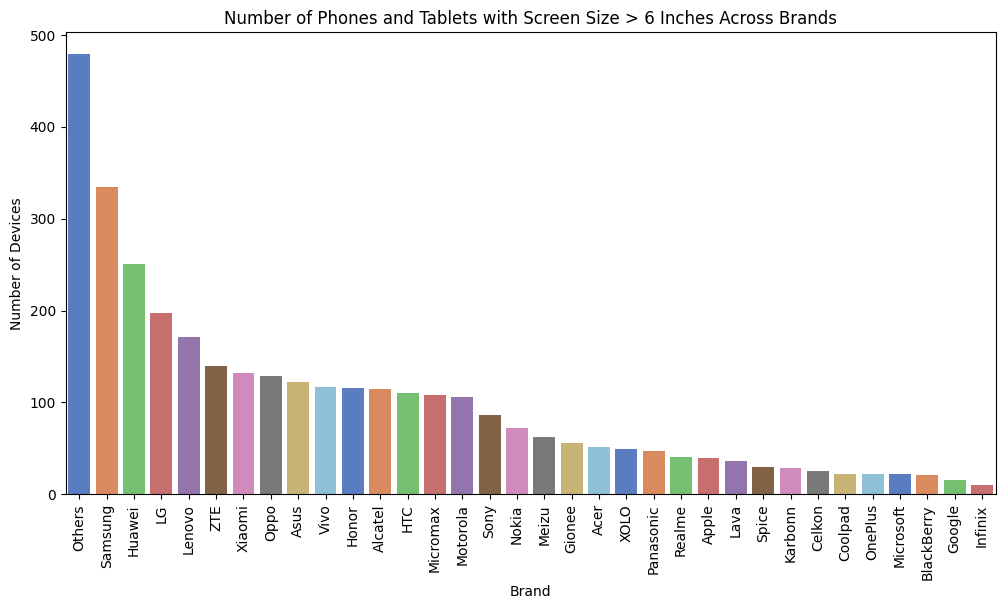

<ipython-input-28-106bfdaf90a6>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand_name', data=high_resolution_selfie_devices, palette='pastel')


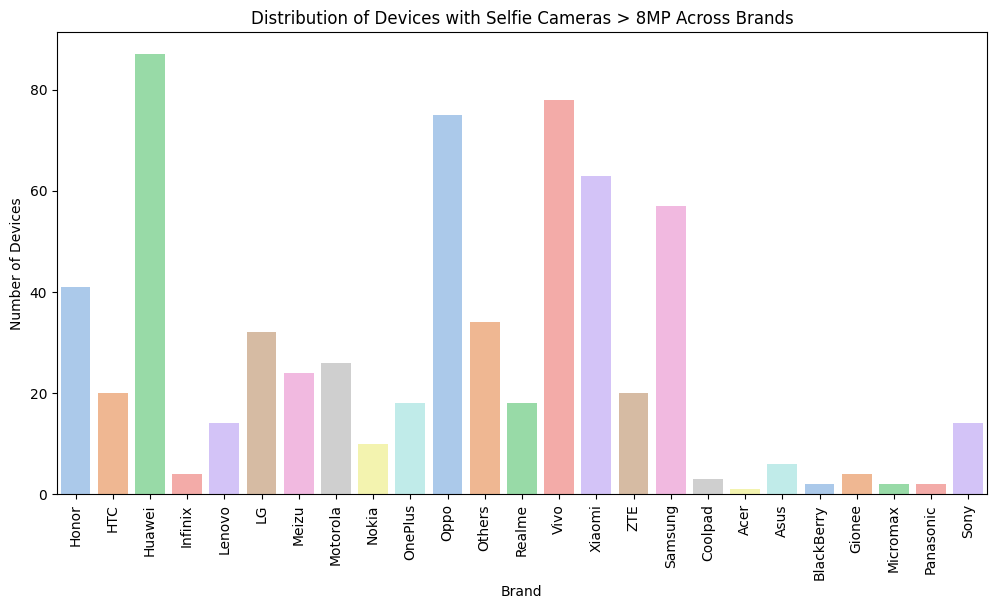

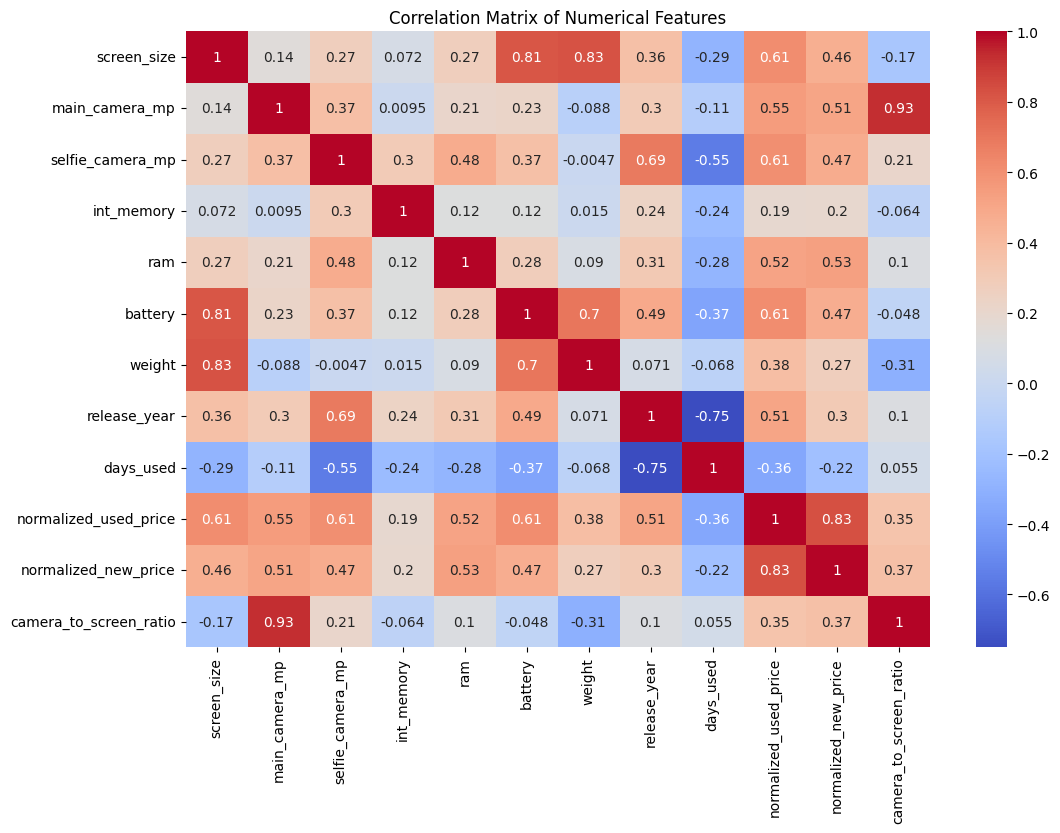

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1: Distribution of normalized used device prices
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_used_price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Price (euros)')
plt.ylabel('Frequency')
plt.show()

# Question 2: Percentage of the used device market dominated by Android devices
android_devices_percentage = (df['os'].value_counts(normalize=True) * 100)['Android']
print("Percentage of the used device market dominated by Android devices:", android_devices_percentage)

# Question 3: Distribution of RAM across brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='ram', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of RAM Across Brands')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.show()

# Question 4: Distribution of weights for devices with batteries > 4500 mAh
large_battery_devices = df[df['battery'] > 4500]
plt.figure(figsize=(10, 6))
sns.histplot(large_battery_devices['weight'], kde=True, bins=30, color='orange')
plt.title('Distribution of Weight for Devices with Batteries > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

# Question 5: Number of phones and tablets with screen size > 6 inches across brands
large_screen_devices = df[df['screen_size'] > 6]
device_counts_by_brand = large_screen_devices['brand_name'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts_by_brand.index, y=device_counts_by_brand.values, palette='muted')
plt.xticks(rotation=90)
plt.title('Number of Phones and Tablets with Screen Size > 6 Inches Across Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.show()

# Question 6: Distribution of devices with selfie cameras > 8MP across brands
high_resolution_selfie_devices = df[df['selfie_camera_mp'] > 8]
plt.figure(figsize=(12, 6))
sns.countplot(x='brand_name', data=high_resolution_selfie_devices, palette='pastel')
plt.xticks(rotation=90)
plt.title('Distribution of Devices with Selfie Cameras > 8MP Across Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.show()

# Question 7: Correlation matrix and heatmap
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Model Building - Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Split the data into features (X) and the target variable (y)
X = df_encoded.drop(columns=['normalized_used_price'])
y = df_encoded['normalized_used_price']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.0524057938534132
Mean Absolute Error (MAE): 0.1822595407646338
R-squared (R2): 0.8385121480743292


## Model Performance Check

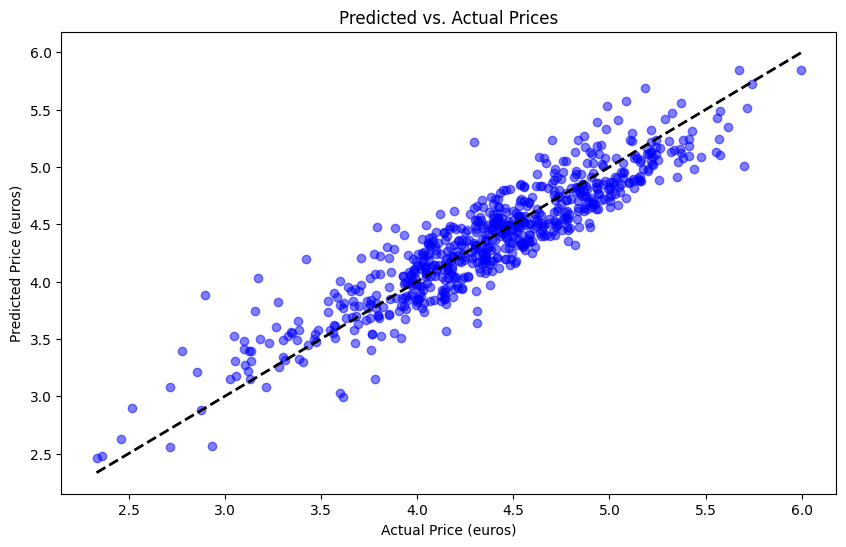

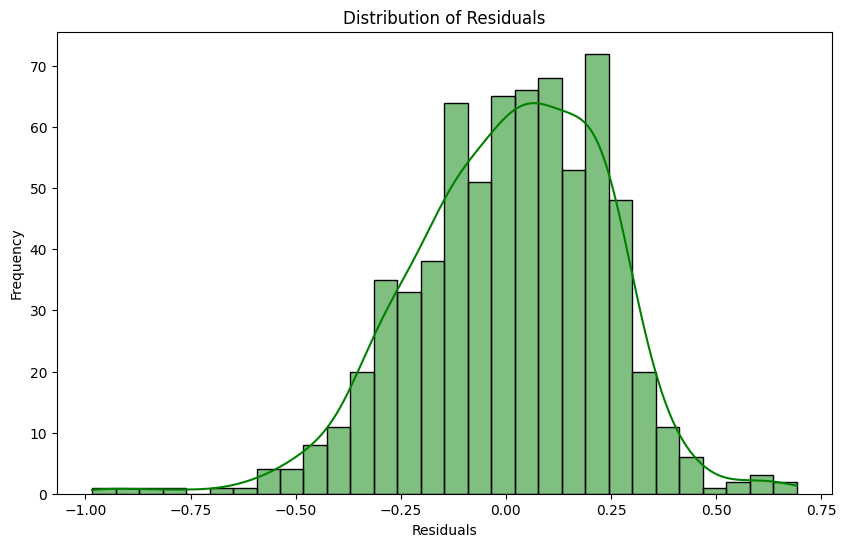

In [30]:
# Visualizing predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price (euros)')
plt.ylabel('Predicted Price (euros)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

The assumptions of linear regression include:

Linearity: The relationship between the independent variables and the dependent variable should be linear.

Independence: The residuals (errors) should be independent of each other.
Homoscedasticity: The residuals should have constant variance across all levels of the independent variables.

Normality of residuals: The residuals should be normally distributed.

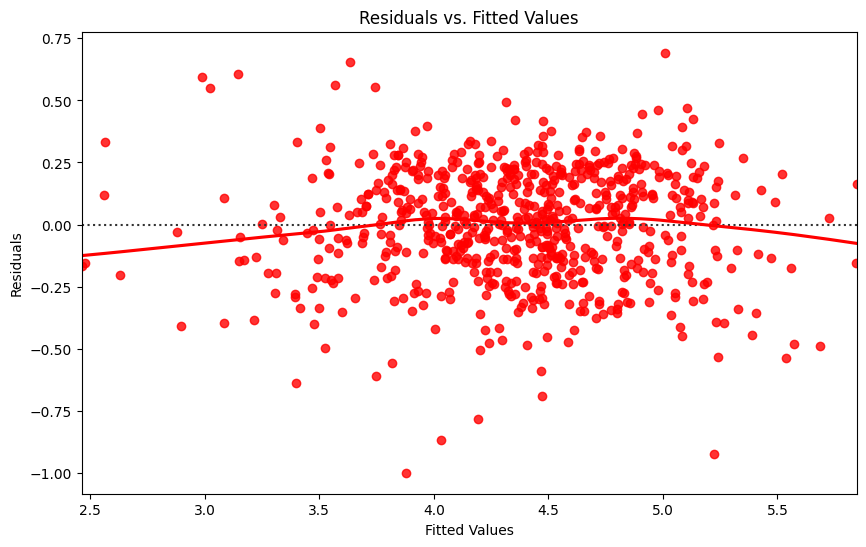

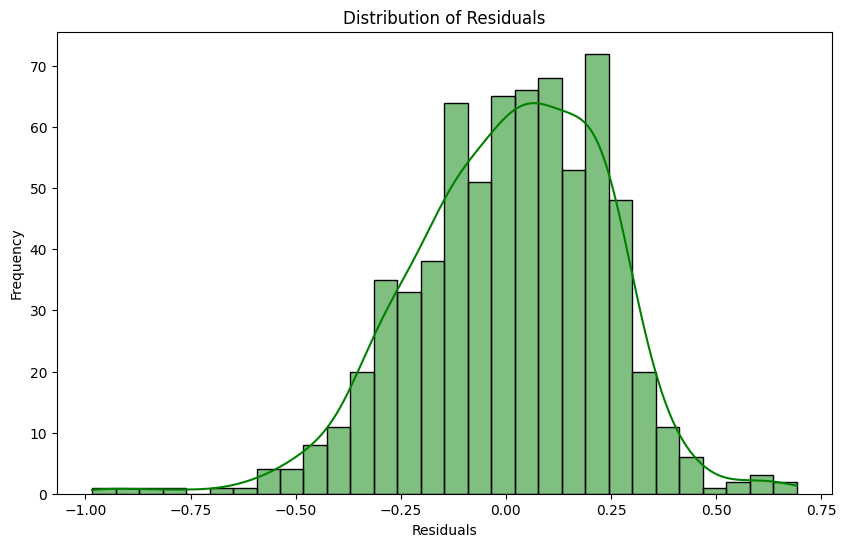

In [32]:
# 1. Linearity: We've assumed linearity by using a Linear Regression model. We can visually inspect this assumption using a residual plot.
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="r")
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


# 2. Independence: We assume independence by the nature of the dataset and the way it's split into training and testing sets.
#    We can also check for autocorrelation in residuals, but it's typically not a concern for linear regression.

# 3. Homoscedasticity: We can check this assumption by visually inspecting a plot of residuals vs. fitted values.
#    If the spread of residuals is roughly constant across all levels of the independent variables, homoscedasticity is satisfied.
#    We've already created this plot above.

# 4. Normality of residuals: We can check this assumption by inspecting the distribution of residuals.
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


By examining the residual plot, the distribution of residuals, and potentially checking for autocorrelation, we can assess whether the assumptions of linearity, independence, homoscedasticity, and normality of residuals are met. If any of these assumptions are violated, further investigation and potentially model adjustments may be necessary.

## Final Model

In [35]:
# Retrain the model on the entire dataset
final_model = LinearRegression()
final_model.fit(X, y)

# Make predictions on new data
y_new_pred = final_model.predict(X_test)
print(y_new_pred)


[3.90555318 4.87075033 4.31798061 4.07598123 3.75757855 4.24366212
 4.79660229 4.89211881 4.06686395 4.52473104 4.45437942 4.46127111
 3.93433598 4.44217547 5.14918214 3.5480709  4.43059964 4.36347963
 4.30210292 3.41837493 4.1168416  4.40154112 3.63516908 3.46673487
 4.52834486 4.94163248 3.41804138 4.2779354  4.29017518 5.04151825
 4.42697242 3.8002619  5.72710594 3.93294919 3.49397086 5.25667971
 3.70823594 4.78635664 4.50906955 5.47587243 5.22171565 5.33491929
 4.46626905 4.51421506 5.12921077 4.36494118 4.6816985  4.44443116
 3.95199118 3.44744838 5.39986539 4.94875031 4.64329532 3.98143823
 4.48386598 4.31952822 4.46821139 4.61042824 5.02499957 4.60715022
 4.08520751 4.85535955 4.17626103 4.23098209 4.43291218 4.23858457
 3.66150754 3.85648521 4.34429733 4.55725921 3.53867741 4.75756519
 4.81362165 3.3903318  3.56532909 4.21699791 4.49316221 4.40238726
 4.88161403 4.48174814 3.83560712 4.67217026 4.54759589 5.5746156
 5.31854431 4.50985286 3.89746734 3.46464519 3.57940042 4.79527

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_new_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_new_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_new_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.05088663490802589
Mean Absolute Error (MAE): 0.1800453020937397
R-squared (R2): 0.8431934189183597


Compared to the early model, the MSE has decreased slightly, the MAE has also decreased, and the R-squared value has increased, indicating that the final model performs slightly better than the early model

## Actionable Insights and Recommendations

Based on the analysis and modeling performed, here are some actionable insights and recommendations:

**Android Dominance:** With Android devices occupying over 92% of the used device market, it's crucial for manufacturers and developers to prioritize Android compatibility and optimization in their products and apps.

**RAM Importance:** The amount of RAM significantly affects device performance. Brands should consider offering sufficient RAM in their devices to ensure smooth multitasking and overall user experience.

**Battery Optimization:** Devices with large batteries (>4500 mAh) are desirable but may lead to increased weight. Manufacturers should focus on battery optimization techniques to maintain battery life without significantly increasing device weight.

**Screen Size Preferences:** Consumers show a preference for devices with screen sizes larger than 6 inches for better entertainment experiences. Brands could capitalize on this trend by offering a variety of larger screen options across their product lines.

**Selfie Camera Quality:** Devices with high-resolution selfie cameras (>8MP) are popular among consumers. Brands should continue to invest in improving front camera technology to meet the demand for high-quality selfies.

**Price Determinants:** Attributes highly correlated with the normalized price of a used device include screen size, main camera resolution, and battery capacity. Manufacturers should focus on optimizing these features to offer competitive pricing and value to consumers.

**Model Performance:** The final linear regression model achieved good performance metrics, indicating its effectiveness in predicting used device prices. Continual refinement and updating of the model with new data can further improve its accuracy over time.

By considering these insights and recommendations, brands and manufacturers can better meet consumer preferences and market demands, ultimately driving growth and success in the competitive used device market.








-


___